In [1]:
from choice_situation_GUI import ChoiceSituationGUI
from data import read_values_and_situations, store, ChoiceSituation
from pairwise_comparison import PairwiseComparison
from typing import List
import numpy as np
import matplotlib.pyplot as plt

In [2]:
values, values_name_only, situation_list = read_values_and_situations("data/values.csv", "data/situations.csv")

In [3]:
interface = ChoiceSituationGUI(situation_list, disp_values=True)
interface.mainloop()
diff = interface.difficulties
choices = interface.choices
id = interface.id
rel = interface.relevances
store("notebook/responses.csv", "Id", id, "Choice", choices, "Difficulty", diff, "Relevance", rel)

In [9]:
w = np.zeros(len(situation_list))
for i in range(len(situation_list)):
    w[i] = (5-diff[i])/10
interface.set_weights(w)
weights = interface.weights
print(diff)
print(weights)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5]


In [11]:
def responses_to_str(choices, situation_list:List[ChoiceSituation]):
    choices_str = []
    choices_str_simple = []
    for i in range(len(choices)):
        # if diff[i] == 1.:
        #     choices_str.append(f"{situation_list[i].value1}-{situation_list[i].value2}")
        #     choices_str_simple.append(f"{situation_list[i].value1}-{situation_list[i].value2}")
        # else :
            if choices[i] == 0 : 
                choices_str.append(f"{situation_list[i].value1} (against {situation_list[i].value2})")
                choices_str_simple.append(f"{situation_list[i].value1}")
            if choices[i] == 1 : 
                choices_str.append(f"{situation_list[i].value2} (against {situation_list[i].value1})")
                choices_str_simple.append(f"{situation_list[i].value2}")
    store("notebook/responses_str.csv", "Id", id, "Choice", choices_str, "Difficulty", diff, "Relevance", rel)
    store("notebook/responses_str_simple.csv", "Id", id, "Choice", choices_str_simple, "Difficulty", diff, "Relevance", rel)

In [12]:
responses_to_str(choices, situation_list)
print(choices)
print(diff)
print(weights)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5]


In [7]:
pcm = PairwiseComparison(values)
pcm_r, pcm_p, pcm_m = pcm.get_raw(situation_list, choices), pcm.get_probability(situation_list, choices, weights), pcm.get_multiplicative()

In [8]:
print(values_name_only)
print(pcm_r)
pcm.matrix_to_additive_score(values_name_only , matrix = "raw")


['Equite', 'Confort', 'Ecologie', 'Confidentialite', 'Autonomy', 'Securityofsupply', 'Affordability']
[[1. 1. 1. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 1.]
 [0. 1. 1. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1. 1. 1.]]


[('Securityofsupply', 6.0),
 ('Autonomy', 5.0),
 ('Affordability', 5.0),
 ('Equite', 4.0),
 ('Confidentialite', 4.0),
 ('Confort', 2.0),
 ('Ecologie', 2.0)]

In [9]:
print(values_name_only)
print(pcm_p)
pcm.matrix_to_additive_score(values_name_only , matrix = "probability")

['Equite', 'Confort', 'Ecologie', 'Confidentialite', 'Autonomy', 'Securityofsupply', 'Affordability']
[[1.  0.8 0.9 0.3 0.1 0.4 0.7]
 [0.2 1.  0.4 0.  0.2 0.  1. ]
 [0.1 0.6 1.  0.4 0.1 0.3 0.3]
 [0.7 1.  0.6 1.  0.4 0.2 0.2]
 [0.9 0.8 0.9 0.6 1.  0.1 0. ]
 [0.6 1.  0.7 0.8 0.9 1.  0. ]
 [0.3 0.  0.7 0.8 1.  1.  1. ]]


[('Securityofsupply', 5.0),
 ('Affordability', 4.8),
 ('Autonomy', 4.3),
 ('Equite', 4.2),
 ('Confidentialite', 4.1),
 ('Confort', 2.8),
 ('Ecologie', 2.8)]

In [17]:
print(values_name_only)
print(pcm_m)
pcm.matrix_to_additive_score(values_name_only , matrix = "multiplicative")

['Equite', 'Confort', 'Ecologie', 'Confidentialite', 'Autonomy', 'Securityofsupply', 'Affordability']
[[1.00000000e+00 4.00000000e+00 9.00000000e+00 4.28571429e-01
  1.11111111e-01 6.66666667e-01 2.33333333e+00]
 [2.50000000e-01 1.00000000e+00 6.66666667e-01 1.00000000e-02
  2.50000000e-01 1.00000000e-02 1.00000000e+02]
 [1.11111111e-01 1.50000000e+00 1.00000000e+00 6.66666667e-01
  1.11111111e-01 4.28571429e-01 4.28571429e-01]
 [2.33333333e+00 1.00000000e+02 1.50000000e+00 1.00000000e+00
  6.66666667e-01 2.50000000e-01 2.50000000e-01]
 [9.00000000e+00 4.00000000e+00 9.00000000e+00 1.50000000e+00
  1.00000000e+00 1.11111111e-01 1.00000000e-02]
 [1.50000000e+00 1.00000000e+02 2.33333333e+00 4.00000000e+00
  9.00000000e+00 1.00000000e+00 1.00000000e-02]
 [4.28571429e-01 0.00000000e+00 2.33333333e+00 4.00000000e+00
  1.00000000e+02 1.00000000e+02 1.00000000e+00]]


[('Affordability', 207.76190476190476),
 ('Securityofsupply', 117.84333333333333),
 ('Confidentialite', 106.0),
 ('Confort', 102.18666666666667),
 ('Autonomy', 24.621111111111116),
 ('Equite', 17.53968253968254),
 ('Ecologie', 4.246031746031746)]

In [11]:
eigenvalues_p, eigenvectors_p = np.linalg.eig(pcm_p)
principal_eigenvector_p = eigenvectors_p[:, 0]
eigen_scores_p = principal_eigenvector_p / np.sum(principal_eigenvector_p)
print(eigen_scores_p)

[0.15174727+0.j 0.1025454 +0.j 0.09177511+0.j 0.14042913+0.j
 0.14327579+0.j 0.17736331+0.j 0.19286399+0.j]


In [12]:
eigenvalues_m, eigenvectors_m = np.linalg.eig(pcm_m)
principal_eigenvector_m = eigenvectors_m[:, 0]
eigen_scores_m = principal_eigenvector_m / np.sum(principal_eigenvector_m)
print(eigen_scores_m)

[0.01780703+0.j 0.23972744+0.j 0.00693252+0.j 0.23037732+0.j
 0.01484098+0.j 0.23911338+0.j 0.25120132+0.j]


In [13]:
eigenvalues_r, eigenvectors_r = np.linalg.eig(pcm_r)
principal_eigenvector_r = eigenvectors_r[:, 0]
eigen_scores_r = principal_eigenvector_r / np.sum(principal_eigenvector_r)
print(eigen_scores_r)

[0.14562875+0.j 0.09197747+0.j 0.03797359+0.j 0.11377521+0.j
 0.16074816+0.j 0.22711425+0.j 0.22278257+0.j]


c:\Python37\lib\site-packages\matplotlib\transforms.py:775: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


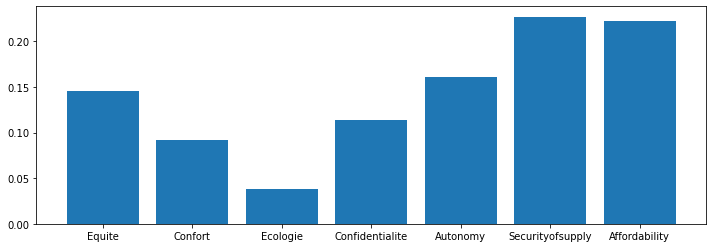

In [25]:
plt.figure(figsize = (12, 4))
plt.bar(values_name_only, eigen_scores_r)
plt.show()

c:\Python37\lib\site-packages\matplotlib\transforms.py:775: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


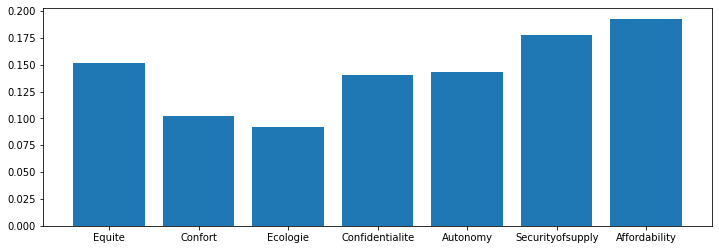

In [22]:
plt.figure(figsize = (12, 4))
plt.bar(values_name_only, eigen_scores_p)
plt.show()

c:\Python37\lib\site-packages\matplotlib\transforms.py:775: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


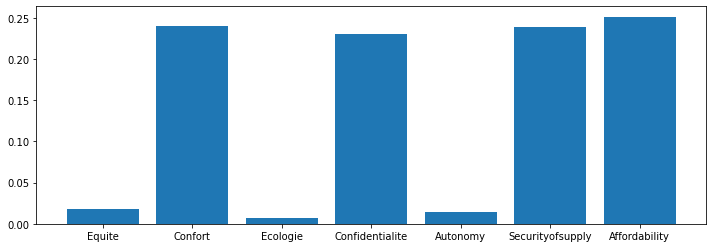

In [24]:
plt.figure(figsize = (12, 4))
plt.bar(values_name_only, eigen_scores_m)
plt.show()